In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Load the dataset
tweet_df = pd.read_csv('train.csv')

# Display the first few rows of the dataframe
print(tweet_df.head())
print(tweet_df.info())

# Print random tweets
for i in range(5):
    print(tweet_df['tweet'].iloc[i], "\n")

# Create a function to process the data
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub(r'ð', '', tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)


   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None
 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

  bihday your majesty 

#model   i love u

In [4]:
# Apply data processing to the tweets
tweet_df['tweet'] = tweet_df['tweet'].apply(data_processing)
tweet_df = tweet_df.drop_duplicates('tweet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a function for lemmatizing the tweets
def lemmatizing(tweet):
    tweet = word_tokenize(tweet)
    tweet = [lemmatizer.lemmatize(word) for word in tweet]
    return " ".join(tweet)

# Apply lemmatizing to the tweets
tweet_df['tweet'] = tweet_df['tweet'].apply(lemmatizing)

# Print the data to see the effect of preprocessing
for i in range(5):
    print(tweet_df['tweet'].iloc[i], "\n")


father dysfunctional selfish drag kid dysfunction run 

thanks lyft credit cant use cause dont offer wheelchair van pdx disapointed getthanked 

bihday majesty 

model love u take u time ur 

factsguide society motivation 



<class 'pandas.core.frame.DataFrame'>
Index: 28424 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      28424 non-null  int64 
 1   label   28424 non-null  int64 
 2   tweet   28424 non-null  object
dtypes: int64(2), object(1)
memory usage: 888.2+ KB
None
label
0    26559
1     1865
Name: count, dtype: int64


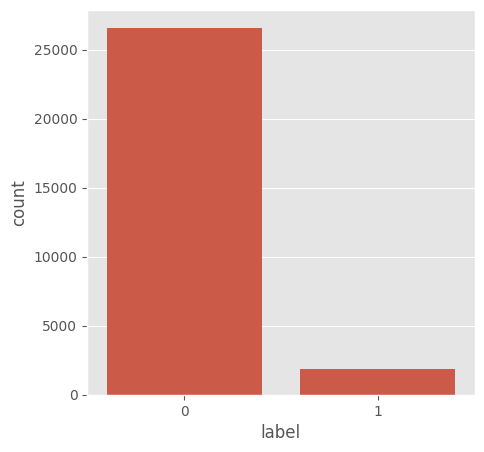

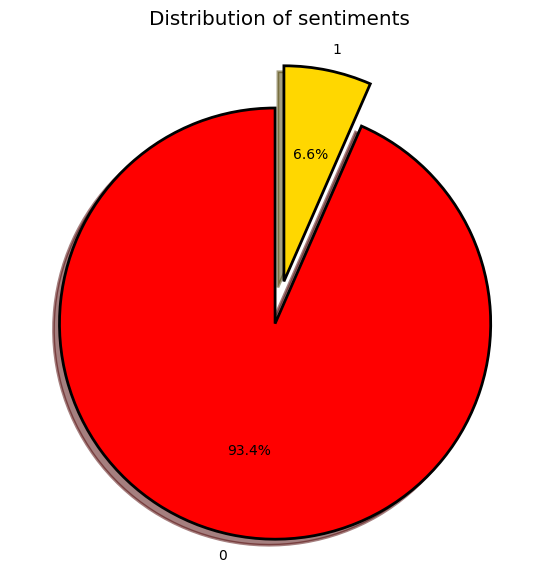

   id  label                                              tweet
0   1      0  father dysfunctional selfish drag kid dysfunct...
1   2      0  thanks lyft credit cant use cause dont offer w...
2   3      0                                     bihday majesty
3   4      0                        model love u take u time ur
4   5      0                      factsguide society motivation


In [5]:
# Display dataframe info and label value counts
print(tweet_df.info())
print(tweet_df['label'].value_counts())

# Plot the distribution of labels
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data=tweet_df)
plt.show()

fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of sentiments')
plt.show()

# Display non-hate tweets
non_hate_tweets = tweet_df[tweet_df.label == 0]
print(non_hate_tweets.head())


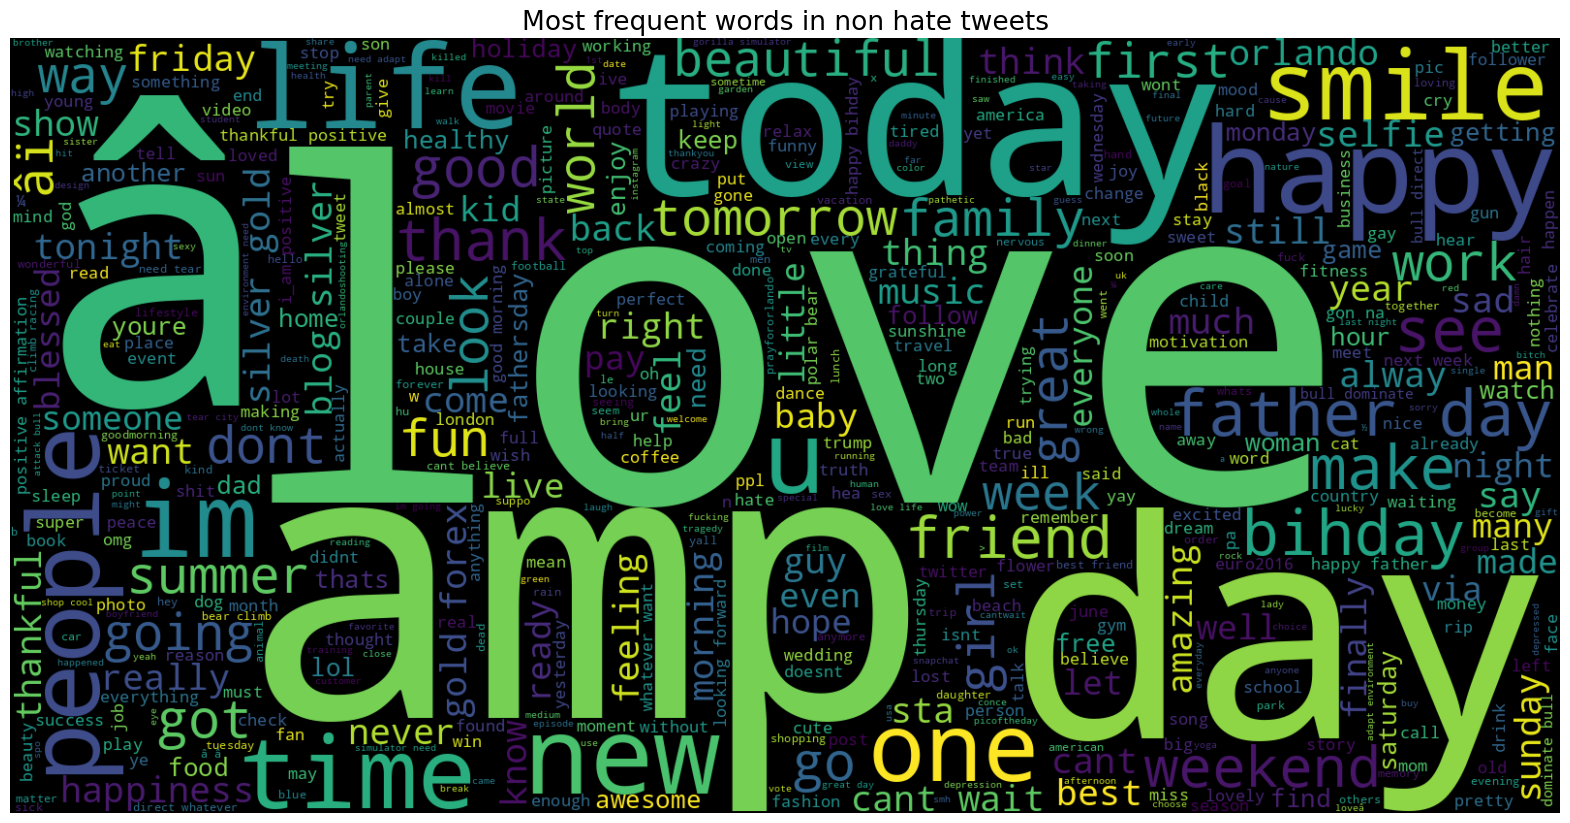

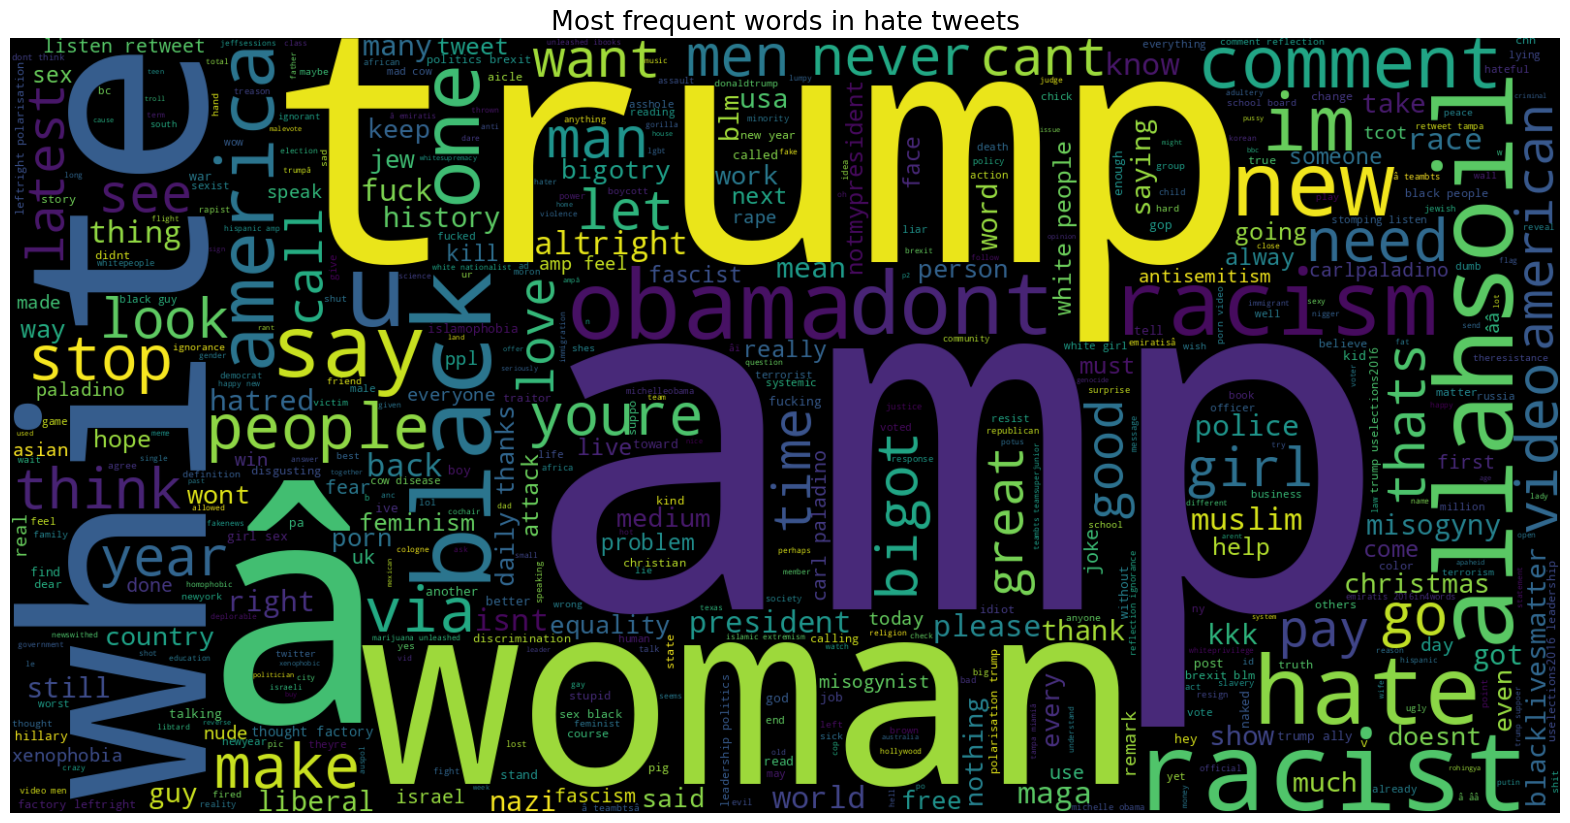

In [6]:
# Word cloud for non-hate tweets
text = ' '.join(non_hate_tweets['tweet'])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize=19)
plt.show()

# Word cloud for hate tweets
hate_tweets = tweet_df[tweet_df.label == 1]
text = ' '.join(hate_tweets['tweet'])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize=19)
plt.show()


In [7]:
# Vectorization using TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1,2)).fit(tweet_df['tweet'])
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

vect = TfidfVectorizer(ngram_range=(1,3)).fit(tweet_df['tweet'])
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

X = tweet_df['tweet']
Y = tweet_df['label']
X = vect.transform(X)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Number of features: 199227

First 20 features: 
['0000001' '0000001 polluting' '00027' '00027 photooftheday' '001' '0035'
 '00h30' '01' '01 4995' '01 7900' '01 blog' '01 croatia' '01 may'
 '01 shopalyssas' '0115' '0115 8599968' '0161' '0161 manny' '019'
 '019 previous']
Number of features: 357592

First 20 features: 
['0000001' '0000001 polluting' '0000001 polluting niger' '00027'
 '00027 photooftheday' '00027 photooftheday music' '001' '0035' '00h30'
 '01' '01 4995' '01 4995 rustic' '01 7900' '01 7900 shopalyssas' '01 blog'
 '01 blog silver' '01 croatia' '01 croatia happy' '01 may' '01 may actual']


Test accuracy: 93.54%


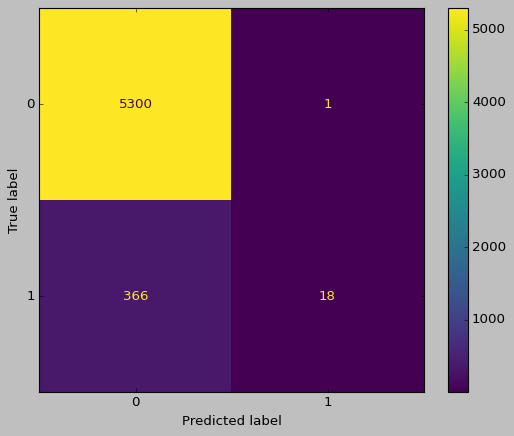

In [8]:
# Train a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc * 100))

# Confusion Matrix
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()


In [9]:
# Grid Search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

param_grid = {'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

y_pred = grid.predict(x_test)
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc * 100))
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))


Best Cross validation score: 0.95
Best parameters:  {'C': 100, 'solver': 'newton-cg'}
Test accuracy: 94.90%
[[5295    6]
 [ 284  100]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5301
           1       0.94      0.26      0.41       384

    accuracy                           0.95      5685
   macro avg       0.95      0.63      0.69      5685
weighted avg       0.95      0.95      0.94      5685

